In [1]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 75.9 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 77.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 52.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.4 MB/s eta 0:00:

In [2]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

2023-06-08 04:14:18.933528: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 04:14:19.000922: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 04:14:19.002325: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 04:14:20.233438: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
hg=fetch_california_housing()

In [4]:
hg

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
hg.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
X=pd.DataFrame(hg.data,columns=hg.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
y=pd.DataFrame(hg.target,columns=['target'])
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [8]:
X.shape,y.shape

((20640, 8), (20640, 1))

In [9]:
X.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [10]:
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [11]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(15480, 6)
(5160, 6)
(11610, 6)
(3870, 6)


In [12]:
Layers=[
    tf.keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1)
]

In [13]:
model=tf.keras.models.Sequential(Layers)

In [14]:
model.compile(optimizer='sgd',loss='mse')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                210       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [16]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [17]:
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 0.8435 - val_loss: 0.4837
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4852 - val_loss: 0.5542
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4573 - val_loss: 0.4666
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4469 - val_loss: 0.4528
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4390 - val_loss: 0.4385
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4339 - val_loss: 0.4362
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4299 - val_loss: 0.4401
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4278 - val_loss: 0.4342
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4250 - val_loss: 0.4331
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4220 - val_loss: 0.4335

In [18]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.843489,0.483712
1,0.485245,0.554168
2,0.457270,0.466573
3,0.446938,0.452766
4,0.438957,0.438477
5,0.433875,0.436240
6,0.429897,0.440066
7,0.427763,0.434237
8,0.424968,0.433144
9,0.422029,0.433485


<AxesSubplot: >

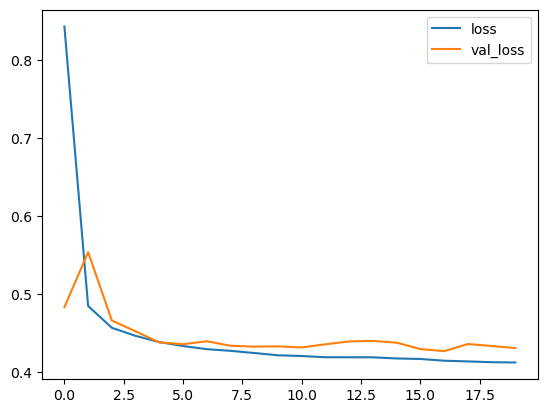

In [19]:
pd.DataFrame(history.history).plot()

In [20]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4167


0.4167093336582184

In [21]:
new=X_test[0]
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735])

In [22]:
new.shape

(6,)

In [23]:
new.reshape((1,6)).shape

(1, 6)

In [24]:
model.predict(new.reshape((1,6)))

1/1 [==============================] - 0s 119ms/step


array([[0.87697095]], dtype=float32)

### Model with callback

In [25]:
model2=tf.keras.models.Sequential(Layers)

In [26]:
model2.compile(loss='mse',optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))

In [27]:
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint('my_keras_model.h5',save_best_only=True)
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
tb_cb=tf.keras.callbacks.TensorBoard(log_dir='logs')


In [28]:
model2.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb,early_stopping_cb,tb_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4048 - val_loss: 0.4324
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4044 - val_loss: 0.4336
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4040 - val_loss: 0.4338
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4043 - val_loss: 0.4316
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4041 - val_loss: 0.4321
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4041 - val_loss: 0.4326
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4039 - val_loss: 0.4331
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4038 - val_loss: 0.4344
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4037 - val_loss: 0.4341


In [29]:
!rm -rf logs
%load_ext tensorboard

In [30]:
%tensorboard --logdir='logs'